___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download('punkt')       
nltk.download('stopwords')   
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Womens Clothing E-Commerce Reviews.csv")

### Data Wrangling

In [7]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


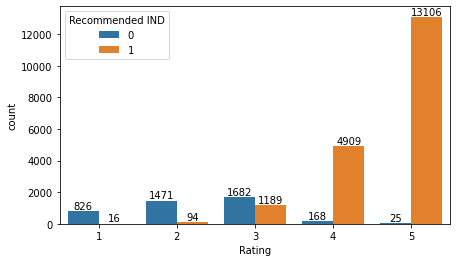

In [8]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [10]:
df["Recommended IND"].unique()

array([1, 0])

In [11]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [12]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

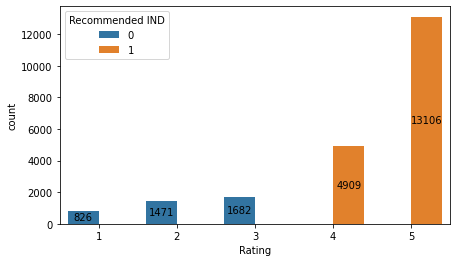

In [13]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

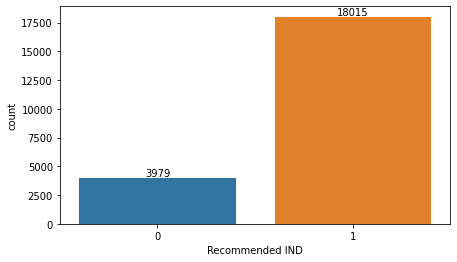

In [14]:
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

In [15]:
df["Recommended IND"].value_counts()

1    18015
0     3979
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [16]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [17]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21994 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21175 non-null  object
 1   label   21994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


---
---


### Missing Value Detection

In [20]:
df.isna().sum()

text     819
label      0
dtype: int64

In [22]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


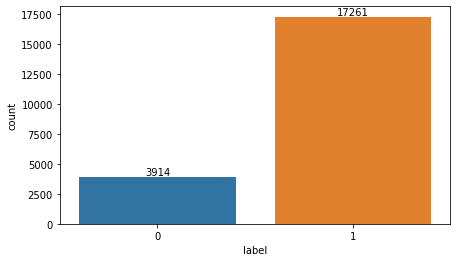

In [24]:
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [26]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [27]:
def cleaning(data):    
     data = data.replace("'", "")
     text_tokens = word_tokenize(data.lower())
     tokens_without_punc = [w for w in text_tokens if w.isalpha()]
     tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
     text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
     return " ".join( text_cleaned)

In [28]:
df["text"] = df["text"].apply(cleaning)
df["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

In [30]:
" ".join(df["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complime

In [34]:
rare_words = pd.Series(" ".join(df["text"]).split()).value_counts()
rare_words

dress          10524
fit             9487
not             9098
size            8665
love            8643
               ...  
lark               1
somethings         1
inexcusable        1
someth             1
platinum           1
Length: 11647, dtype: int64

In [35]:
rare_words = rare_words[rare_words <= 2] 

In [36]:
rare_words.index

Index(['crave', 'embellished', 'exotic', 'rona', 'materia', 'loooove',
       'intarsia', 'trade', 'bei', 'strength',
       ...
       'detaches', 'bootles', 'odette', 'oblong', 'cooking', 'lark',
       'somethings', 'inexcusable', 'someth', 'platinum'],
      dtype='object', length=6329)

In [37]:
df["text"] = df["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [42]:
positive_sentences = df[df["label"]==1]["text"]
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        basket hte last see would look like person sto...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely feminine fit perfectly easy wear ...
Name: text, Length: 17261, dtype: object

In [43]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun want pair pant l...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

In [45]:
len(positive_sentences),len(negative_sentences)

(17261, 3914)

### Collect Words (positive and negative separately)

In [46]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt basket hte last see would look like person store pick went teh color pale hte color really gorgeous turn trying little baggy hte x hte size bummer no petite decided though said everything pant skirt trying kept ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc bit big sleeve long doesnt go petite also bit loose no xx kept wil later since light color already sold hte smallest size love dress usually get x run little snug bust ordered size flattering feminine u

In [47]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure find something exchange l

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [49]:
wordcloud_positive = WordCloud(background_color ="red", max_words=250)
wordcloud_positive.generate(positive_words)

In [56]:
wordcloud_negative = WordCloud(background_color ="red", max_words=250)
wordcloud_negative.generate(negative_words)

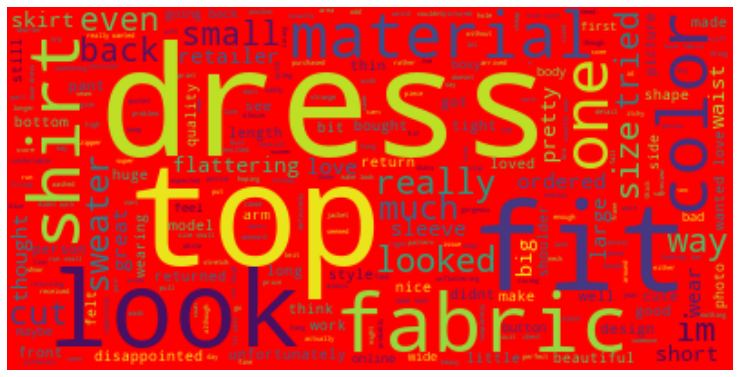

In [54]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",)
plt.axis("off")
plt.show()

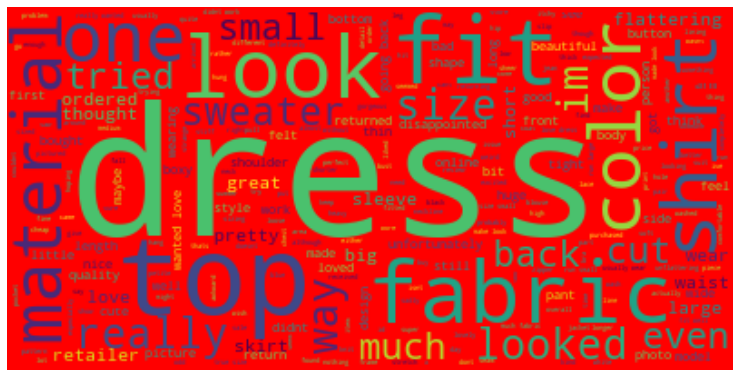

In [57]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [58]:
df.label = df.label.map({1:0, 0:1})

In [59]:
X = df['text'].values
y = df['label'].values

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) 
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [63]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [67]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.172463,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.154299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.241502,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.133637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [70]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Logistic Regression

### CountVectorizer

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=0)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=0)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3452
           1       0.61      0.85      0.71       783

    accuracy                           0.87      4235
   macro avg       0.79      0.86      0.82      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



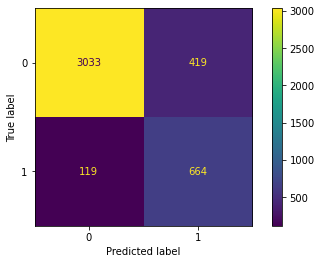

In [74]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [75]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=0)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869008
train_accuracy     0.882559
test_f1            0.709588
train_f1           0.739349
test_recall        0.865848
train_recall       0.901168
test_precision     0.601357
train_precision    0.626800
dtype: float64

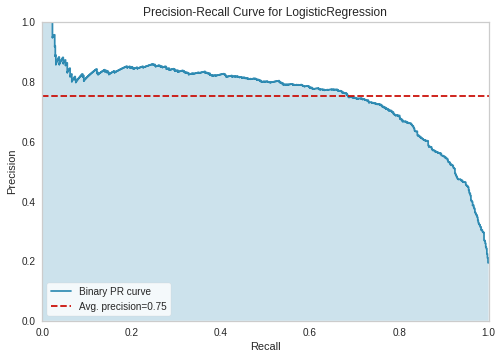

In [76]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=0))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [77]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [78]:
log = LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=0)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=0)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.87      0.72       783

    accuracy                           0.88      4235
   macro avg       0.79      0.87      0.82      4235
weighted avg       0.90      0.88      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.62      0.91      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



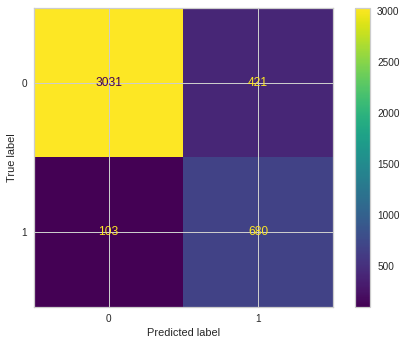

In [79]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [81]:
model = LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=0)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.868418
train_accuracy     0.879752
test_f1            0.711683
train_f1           0.737204
test_recall        0.878632
train_recall       0.912524
test_precision     0.598278
train_precision    0.618397
dtype: float64

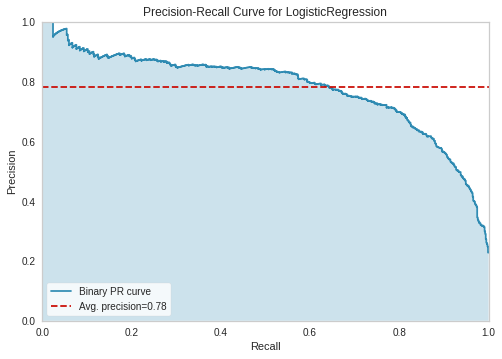

In [82]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=0)
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [83]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [89]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.5)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.71      0.80      0.75       783

    accuracy                           0.90      4235
   macro avg       0.83      0.86      0.85      4235
weighted avg       0.91      0.90      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.76      0.86      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.93     16940



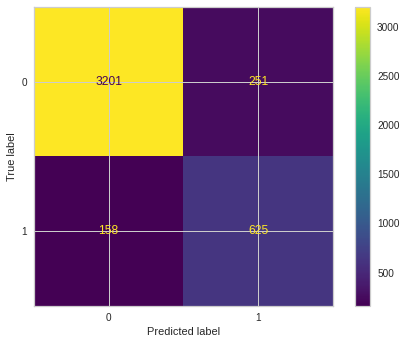

In [85]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

In [86]:
model = MultinomialNB(alpha=0.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.904368
train_accuracy     0.925305
test_f1            0.756266
train_f1           0.810227
test_recall        0.802932
train_recall       0.862699
test_precision     0.715213
train_precision    0.763774
dtype: float64

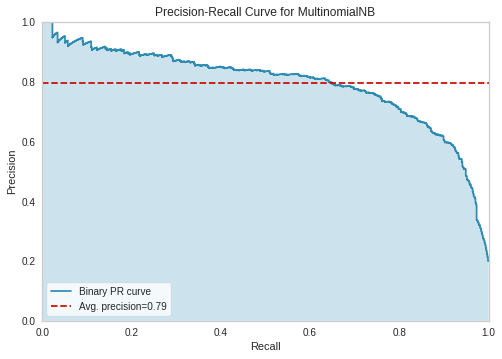

In [87]:
viz = PrecisionRecallCurve(MultinomialNB(alpha=0.5))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [88]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [90]:
nb = BernoulliNB(alpha=0.5)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.5)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.79      0.75       783

    accuracy                           0.90      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.90      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.76      0.85      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.88     16940
weighted avg       0.93      0.92      0.92     16940



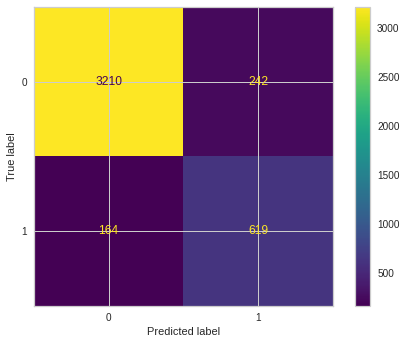

In [91]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [92]:
model = BernoulliNB(alpha=0.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.901417
train_accuracy     0.923587
test_f1            0.747047
train_f1           0.804525
test_recall        0.787599
train_recall       0.850775
test_precision     0.710856
train_precision    0.763047
dtype: float64

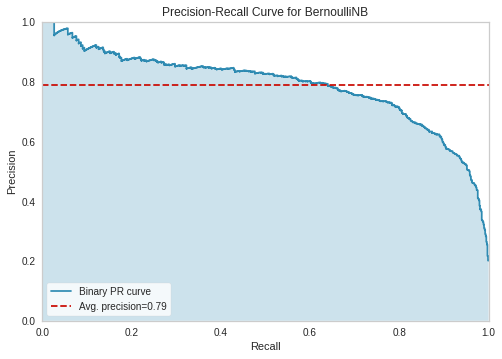

In [94]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.5),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [95]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [96]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=0)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=0)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3452
           1       0.66      0.86      0.75       783

    accuracy                           0.89      4235
   macro avg       0.82      0.88      0.84      4235
weighted avg       0.91      0.89      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.71      0.94      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.93      0.88     16940
weighted avg       0.94      0.92      0.92     16940



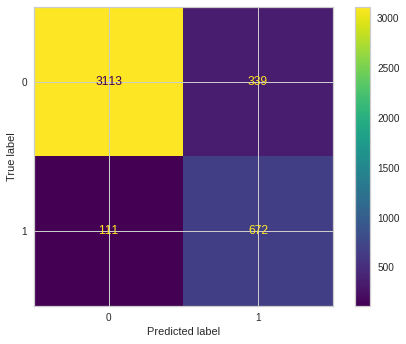

In [97]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

In [98]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=0)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.891381
train_accuracy     0.920484
test_f1            0.745463
train_f1           0.814575
test_recall        0.860423
train_recall       0.944959
test_precision     0.657945
train_precision    0.715811
dtype: float64

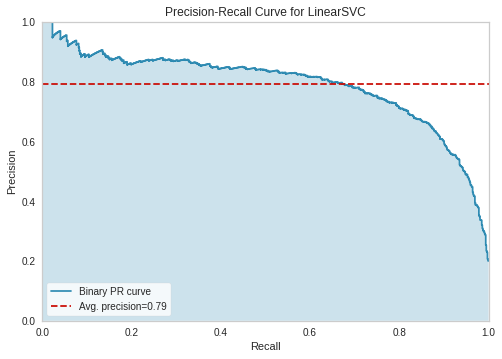

In [99]:
viz = PrecisionRecallCurve(LinearSVC(C=0.01, class_weight="balanced", random_state=0))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [100]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [101]:
svc = LinearSVC(C=0.8, class_weight="balanced", random_state=0)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.8, class_weight='balanced', random_state=0)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3452
           1       0.67      0.84      0.74       783

    accuracy                           0.89      4235
   macro avg       0.81      0.87      0.84      4235
weighted avg       0.91      0.89      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     13809
           1       0.79      0.98      0.87      3131

    accuracy                           0.95     16940
   macro avg       0.89      0.96      0.92     16940
weighted avg       0.96      0.95      0.95     16940



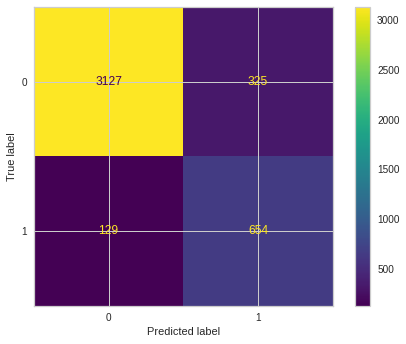

In [102]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [103]:
model = LinearSVC(C=0.8, class_weight="balanced", random_state=0)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.894333
train_accuracy     0.950092
test_f1            0.744931
train_f1           0.879177
test_recall        0.834871
train_recall       0.982398
test_precision     0.672934
train_precision    0.795589
dtype: float64

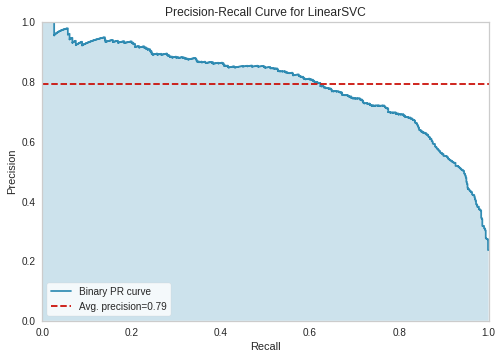

In [104]:
viz = PrecisionRecallCurve(LinearSVC(C=0.8, class_weight="balanced", random_state=0))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [105]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 10, n_jobs = -1, class_weight="balanced", random_state = 0)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=0)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3452
           1       0.61      0.81      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.85      0.81      4235
weighted avg       0.89      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.65      0.89      0.75      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.84     16940
weighted avg       0.91      0.89      0.90     16940



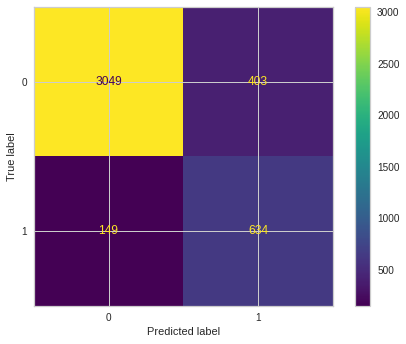

In [109]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [110]:
model = RandomForestClassifier(100, max_depth = 10, n_jobs = -1, class_weight="balanced", random_state = 0)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.862102
train_accuracy     0.891434
test_f1            0.686201
train_f1           0.753325
test_recall        0.815077
train_recall       0.896696
test_precision     0.592858
train_precision    0.649599
dtype: float64

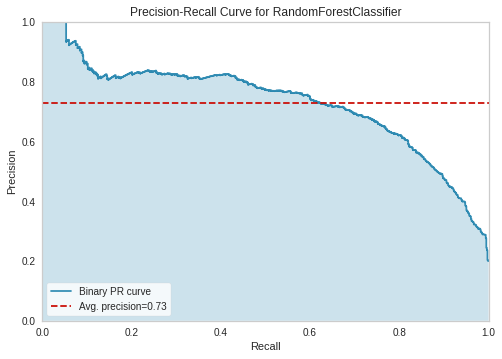

In [111]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 10, n_jobs = -1, class_weight="balanced", random_state = 0))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [112]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [113]:
rf = RandomForestClassifier(100, max_depth =10, random_state = 0, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=0)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3452
           1       0.59      0.79      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.83      0.79      4235
weighted avg       0.88      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.65      0.90      0.75      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.84     16940
weighted avg       0.91      0.89      0.90     16940



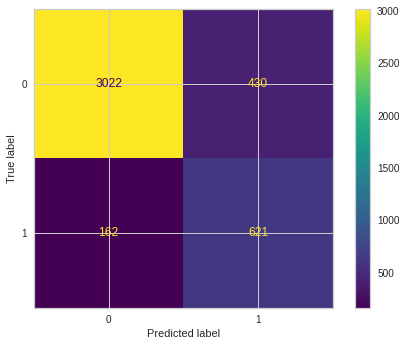

In [114]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

In [115]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 0, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.854841
train_accuracy     0.891185
test_f1            0.673897
train_f1           0.754854
test_recall        0.811236
train_recall       0.906348
test_precision     0.576788
train_precision    0.646770
dtype: float64

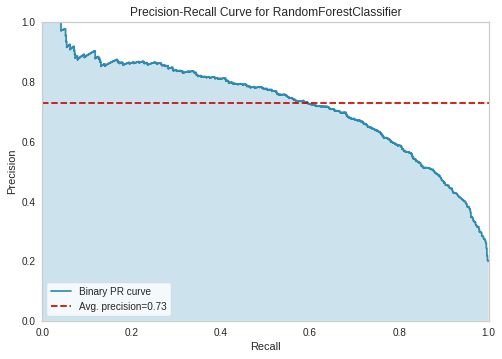

In [116]:
viz = PrecisionRecallCurve(RandomForestClassifier(100, max_depth = 10, random_state = 0, n_jobs = -1, class_weight="balanced"))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [117]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 0, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=0)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.78      0.64      0.71       783

    accuracy                           0.90      4235
   macro avg       0.85      0.80      0.82      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.78      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.92      0.93      0.92     16940



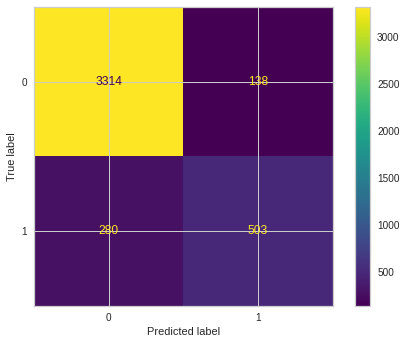

In [119]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

In [120]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 0, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.900531
train_accuracy     0.928965
test_f1            0.703446
train_f1           0.790574
test_recall        0.638457
train_recall       0.725434
test_precision     0.784020
train_precision    0.868584
dtype: float64

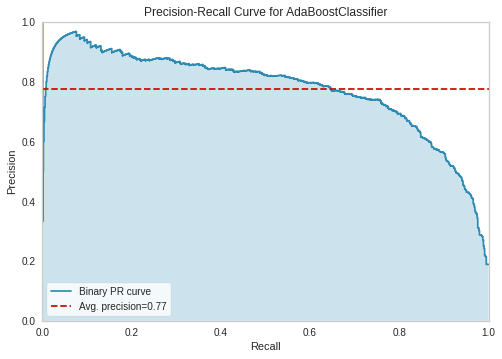

In [121]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500, random_state = 0, learning_rate=0.8))
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [122]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [123]:
ada = AdaBoostClassifier(n_estimators= 300, random_state = 0, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=300, random_state=0)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.78      0.62      0.69       783

    accuracy                           0.90      4235
   macro avg       0.85      0.79      0.82      4235
weighted avg       0.89      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13809
           1       0.85      0.72      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.89      0.84      0.87     16940
weighted avg       0.92      0.92      0.92     16940



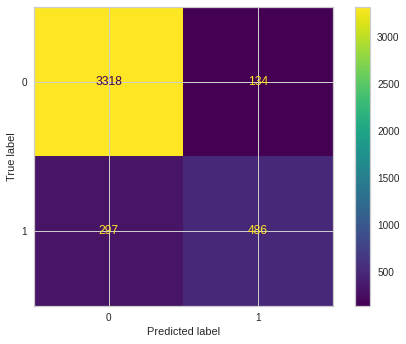

In [124]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

In [125]:
model = AdaBoostClassifier(n_estimators= 300, random_state = 0, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.895986
train_accuracy     0.925849
test_f1            0.689972
train_f1           0.781994
test_recall        0.626950
train_recall       0.719543
test_precision     0.768666
train_precision    0.856344
dtype: float64

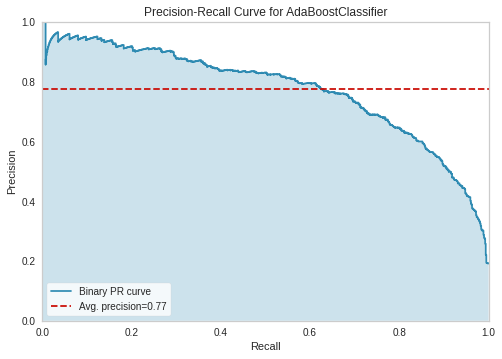

In [126]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 300, random_state = 0, learning_rate=0.8))
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [127]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [141]:
df.shape

(21175, 2)

### Tokenization

In [146]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [147]:
tokenizer.fit_on_texts(X)

### Creating word index

In [148]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'color': 7,
 'like': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'perfect': 16,
 'really': 17,
 'little': 18,
 'ordered': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'comfortable': 24,
 'back': 25,
 'bought': 26,
 'nice': 27,
 'cute': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'sweater': 33,
 'large': 34,
 'jean': 35,
 'much': 36,
 'length': 37,
 'run': 38,
 'also': 39,
 'work': 40,
 'got': 41,
 'petite': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'skirt': 46,
 'quality': 47,
 'medium': 48,
 'retailer': 49,
 'think': 50,
 'even': 51,
 'pretty': 52,
 'make': 53,
 'feel': 54,
 'x': 55,
 'pant': 56,
 'store': 57,
 'tried': 58,
 'usually': 59,
 'get': 60,
 'sleeve': 61,
 'way': 62,
 'good': 63,
 'go': 64,
 'could': 65,
 'cut': 66,
 'dont': 67,
 'big': 68,
 'black': 69,
 'made': 70,
 'still': 71,
 'right': 72,
 'true': 73,
 '

In [149]:
len(tokenizer.word_index)

5318

### Converting tokens to numeric

In [150]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [151]:
X[105]

'dress quite flattering flirty feminine no way dress received new color faded washed red black stain belt area no tag fabric look droopy laundered not crisp stiff new disappointed quality item received one going back dear retailer please make sure not send clothing article'

In [152]:
print(X_num_tokens[105])

[1, 181, 21, 1022, 277, 81, 62, 1, 168, 328, 7, 1001, 335, 188, 69, 1415, 302, 200, 81, 593, 14, 9, 2357, 2627, 3, 1205, 500, 328, 247, 47, 299, 168, 20, 116, 25, 3027, 49, 662, 53, 157, 3, 846, 502, 3028]


### Maximum number of tokens for all documents¶

In [153]:
len(X_num_tokens[105])

44

In [154]:
len(X_num_tokens[100])

30

In [155]:
len(X_num_tokens[150])

13

In [156]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens.mean()

28.317685950413225

In [157]:
num_tokens.max()

59

In [159]:
num_tokens.min()

1

In [160]:
num_tokens.argmax()

11189

In [161]:
X[11189]

'liked shirt much ordered second one online size different color unfortunately second one much shorter first look le like tunic like cropped flowy top not good look second one going back otherwise shirt would get star wash well super soft comfy look great kind bottom jean cord legging wish came color typically wear l retailer top took l th'

In [162]:
max_tokens = 59

In [163]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [164]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [165]:
X_pad.shape

(21175, 59)

In [167]:
np.array(X_num_tokens[100])

array([  32,  353,  296, 1639,  410,    7,    5,  168, 1747,  127,  414,
         35,  703,  193,   46,    2,   73,    4,  169,   10,   15,   49,
         93, 2356,   30,   91,   99,   13,  163,    6])

In [168]:
X_pad[100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   32,  353,  296, 1639,
        410,    7,    5,  168, 1747,  127,  414,   35,  703,  193,   46,
          2,   73,    4,  169,   10,   15,   49,   93, 2356,   30,   91,
         99,   13,  163,    6], dtype=int32)

In [169]:
np.array(X_num_tokens[11189])

array([256,  32,  36,  19, 459,  20,  77,   4, 171,   7, 245, 459,  20,
        36, 234, 109,   9, 423,   8, 288,   8, 428, 217,   6,   3,  63,
         9, 459,  20, 116,  25, 367,  32,  13,  60, 485, 267,  23,  74,
        22, 164,   9,  11, 303,  95,  35, 951, 176, 160, 265,   7, 314,
        10, 390,  49,   6, 291, 390, 814])

In [170]:
X_pad[11189]

array([256,  32,  36,  19, 459,  20,  77,   4, 171,   7, 245, 459,  20,
        36, 234, 109,   9, 423,   8, 288,   8, 428, 217,   6,   3,  63,
         9, 459,  20, 116,  25, 367,  32,  13,  60, 485, 267,  23,  74,
        22, 164,   9,  11, 303,  95,  35, 951, 176, 160, 265,   7, 314,
        10, 390,  49,   6, 291, 390, 814], dtype=int32)

### Train Set Split

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

### Modeling

In [173]:
model = Sequential()

In [174]:
embedding_size = 50

In [175]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [176]:
optimizer = Adam(lr=0.002)

In [177]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [178]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 59, 50)            0         
                                                                 
 gru (GRU)                   (None, 59, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 59, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 59, 24)            5328      
                                                                 
 dropout_2 (Dropout)         (None, 59, 24)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [179]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [180]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61336809, 2.705206  ])

In [181]:
model.fit(X_train, y_train, epochs=50, batch_size=128, sample_weight=classes_weights, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
133/133 [==============================] - 21s 113ms/step - loss: 0.4135 - recall: 0.8441 - val_loss: 0.3282 - val_recall: 0.9017
Epoch 2/50
133/133 [==============================] - 13s 100ms/step - loss: 0.2528 - recall: 0.9186 - val_loss: 0.3183 - val_recall: 0.8851
Epoch 3/50
133/133 [==============================] - 14s 102ms/step - loss: 0.2018 - recall: 0.9457 - val_loss: 0.2968 - val_recall: 0.8774
Epoch 4/50
133/133 [==============================] - 14s 102ms/step - loss: 0.1598 - recall: 0.9566 - val_loss: 0.3193 - val_recall: 0.8531
Epoch 4: early stopping


In [182]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.413511,0.844139,0.328174,0.901660
1,0.252823,0.918556,0.318254,0.885057
2,0.201791,0.945704,0.296784,0.877395
3,0.159757,0.956563,0.319270,0.853129


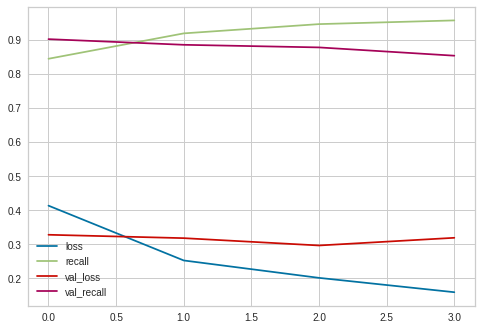

In [184]:
model_loss.plot();

In [185]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

133/133 [==============================] - 3s 15ms/step
[[2943  509]
 [  77  706]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3452
           1       0.58      0.90      0.71       783

    accuracy                           0.86      4235
   macro avg       0.78      0.88      0.81      4235
weighted avg       0.90      0.86      0.87      4235



In [186]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

530/530 [==============================] - 6s 12ms/step
[[11901  1908]
 [  108  3023]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     13809
           1       0.61      0.97      0.75      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.91      0.84     16940
weighted avg       0.92      0.88      0.89     16940



133/133 [==============================] - 2s 13ms/step


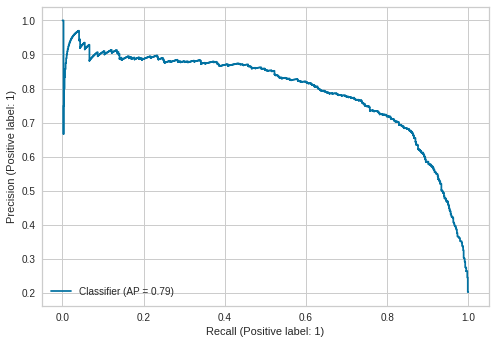

In [187]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [188]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7937929394758487

In [189]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [190]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.0 MB/s eta 0:00:00


### Read Data

In [191]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [192]:
max_token = []
for sent in X:

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  68


In [193]:
np.array(max_token).mean()

32.89657615112161

In [194]:
sum(np.array(max_token) <= 160) / len(max_token)

1.0

### Train test split

In [195]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [196]:
def transformation(X):
  
  seq_len = 162
  num_samples = len(X)

  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [197]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [198]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (16940, 162)
Xmask_train.shape : (16940, 162)
Xids_test.shape   : (4235, 162)
Xmask_test.shape  : (4235, 162)


In [199]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [200]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [201]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [202]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [203]:
def map_func(Xids, Xmask, labels):
    
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [204]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [205]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [206]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [207]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model

In [208]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [209]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = Adam(learning_rate=2e-5)
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [210]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [211]:
history = model3.fit(train_ds2, validation_data= val_ds, epochs=1) 

530/530 [==============================] - 203s 209ms/step - loss: 0.2462 - recall: 0.6429 - val_loss: 0.1951 - val_recall: 0.8506


### Model evaluation

In [212]:
y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

133/133 [==============================] - 17s 94ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3452
           1       0.74      0.85      0.79       783

    accuracy                           0.92      4235
   macro avg       0.85      0.89      0.87      4235
weighted avg       0.92      0.92      0.92      4235



In [213]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

530/530 [==============================] - 15s 27ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13809
           1       0.82      0.92      0.87      3131

    accuracy                           0.95     16940
   macro avg       0.90      0.94      0.92     16940
weighted avg       0.95      0.95      0.95     16940



133/133 [==============================] - 5s 28ms/step


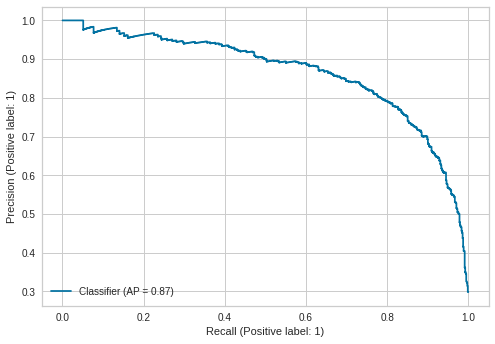

In [214]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [215]:
average_precision_score(y_test2, y_pred_proba)

0.8659032435455589

In [216]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [218]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]})

compare

,Model,F1_Score,Recall_Score,Average_Precision_Score
0,NaiveBayes_count,0.753466,0.798212,0.794191
1,LogReg_count,0.711683,0.848020,0.752666
2,SVM_count,0.749164,0.858238,0.790936
3,Random Forest_count,0.696703,0.809706,0.729607
4,AdaBoost_count,0.706461,0.642401,0.774354
5,NaiveBayes_tfidf,0.753041,0.790549,0.788013
6,LogReg_tfidf,0.721868,0.868455,0.781117
7,SVM_tfidf,0.742338,0.835249,0.792893
8,Random Forest_tfidf,0.677208,0.793103,0.727805
9,AdaBoost_tfidf,0.692801,0.620690,0.774414


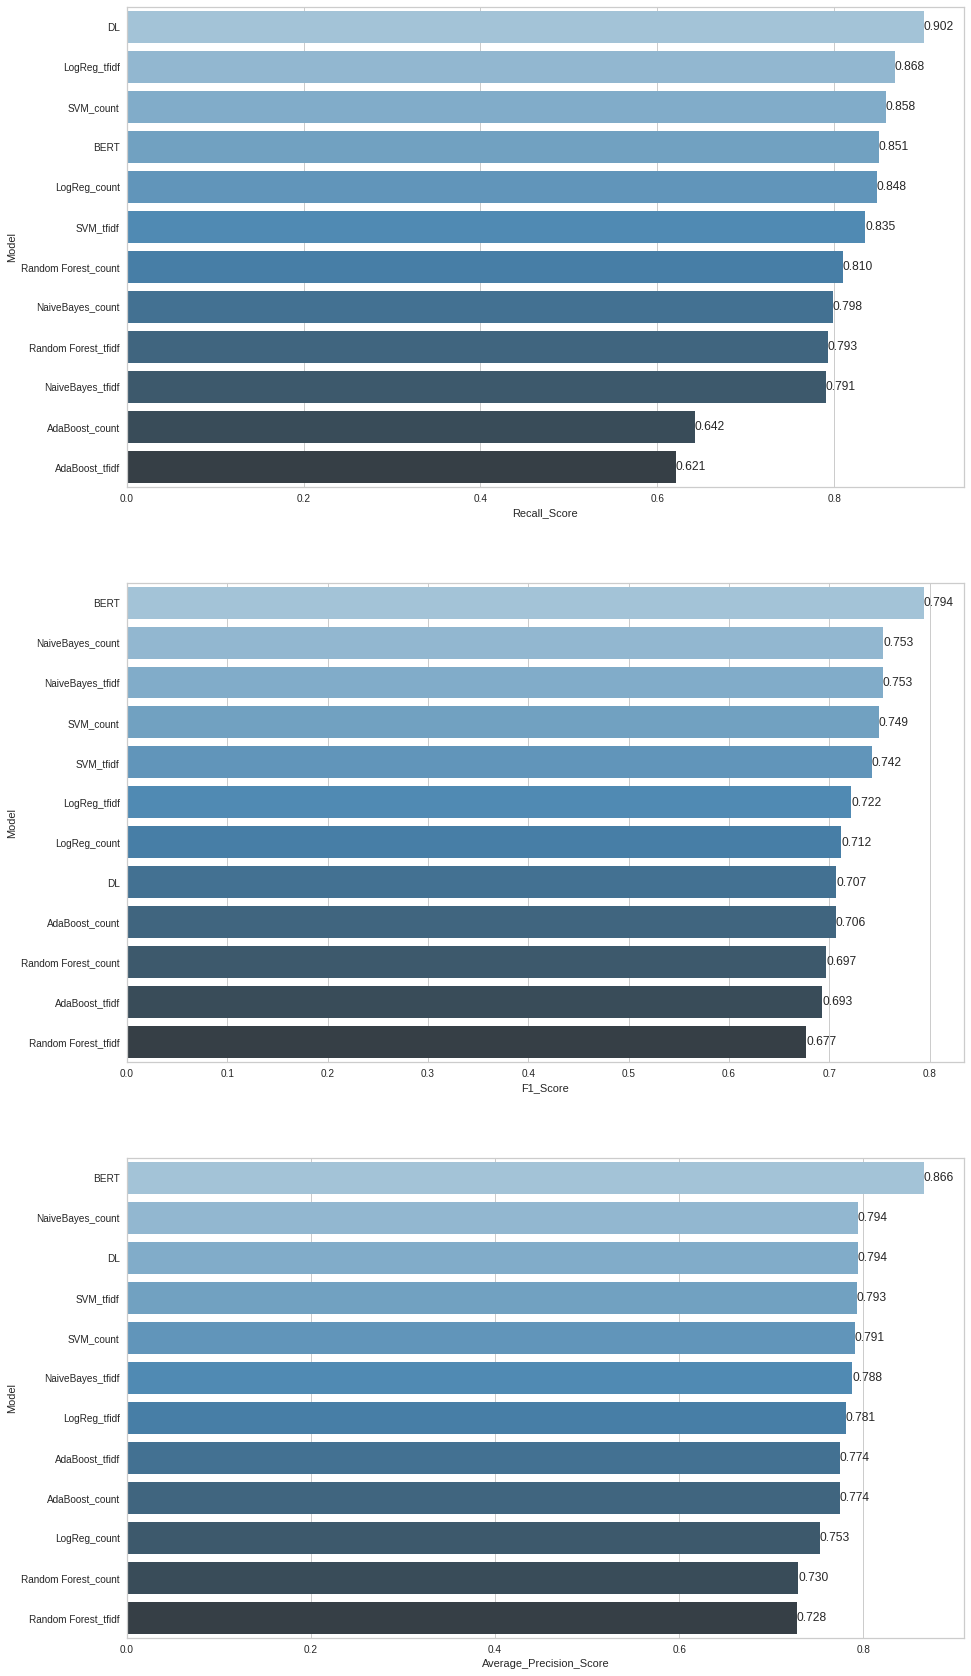

In [217]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___